# 機械学習 第1回　レポート課題



## はじめに

本レポートでは, 以下のデータセットと手法を用いて機械学習を行う.

- データセット
    - scikit-learnのデータセットの中にあるボストンの住宅価格のデータセットを利用.
    - data: 506個, 属性13種類. MEDVが教師データ.
- 特徴
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per \$10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
    

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# データセットロード
boston = datasets.load_boston()

# print(boston.DESCR)

# 特徴量
X = boston.data[:, [5]] # B

# 目的変数
Y = boston.target

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, test_size=0.4)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 予測　
Y_pred = lr.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

MAE = 6.07,  RMSE = 8.57,  score = 0.13
Coef =  [0.03253268]
Intercept = 10.913802448762988


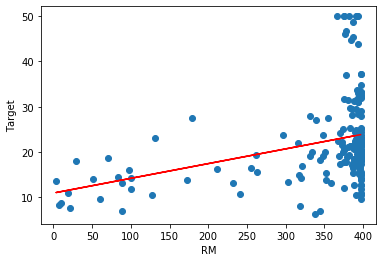

In [30]:
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_test, "o")
plt.plot(X_test, Y_pred, "r")